<a href="https://colab.research.google.com/github/Deepak-Mewada/TensorFlowAdvancedTechniquesSpecialization_DeeplearningAI/blob/main/C1/W1/TF2C1W1L2_multi_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is based on Tensorflow Advance Speacialization week1 lab 2 

#Ungraded Lab: Build a Multi-output Model

In this lab, we'll show how you can build models with more than one output. The dataset we will be working on is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency). It is an Energy Efficiency dataset which uses the bulding features (e.g. wall area, roof area) as inputs and has two outputs: Cooling Load and Heating Load. Let's see how we can build a model to train on this data.

#Import

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Utilitites

We define a few utilities for data conversion and visualization to make our code more neat.

In [29]:
def formet_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)

  return y1, y2

def norm(x):
  return(x- train_stats['mean'])/ train_stats['std']

def plot_diff(y_true, y_pred, title = ''):
  plt.scatter(y_true , y_pred)
  plt.title(title)
  plt.xlabel('True values')
  plt.ylabel('Prerdictions')
  plt.axis('equal')
  plt.axis('square') 
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100,100], [-100,100])
  plt.show()


def plot_metrics(metric_name , title , ylim = 5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name], color = 'blue', label = metric_name)
  plt.plot(history.history['val_'+ metric_name], color = 'green' , label = 'val_' + metric_name) 
  plt.show() 

# Prepare the Data
We download the dataset and format it for training.

In [37]:
# Specify the URI

URI = 'ENB2012_data.xlsx'

#use pandas excel reader
df = pd.read_excel(URI)
df = df.sample(frac=1).reset_index(drop=True)

#split the data into train test split with 80 train/ 20 test
train , test = train_test_split(df, test_size = 0.2)
train_stats = train.describe()

#Get y1 and Y2 as the 2 output and formet them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = formet_output(train)
test_Y  = formet_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X  = norm(test)


# Build the model

Here is how we'll build the model using the functional syntax. Notice that we can specify a list of outputs (i.e. [y1_output, y2_output]) when we instantiate the Model() class.

In [44]:
len(train.shape, )

2

In [51]:
# Define model layers.
input_layer = Input(shape = (len(train.columns), ))
first_dense = Dense(units = 128 , activation = 'relu')(input_layer)
second_dense = Dense(units = 128, activation = 'relu')(first_dense)


# Y1 output will be fed directly from the second dense
y1_output = Dense(units=1 , name = 'y1_output')(second_dense)
third_dense = Dense(units= 128, activation = 'relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units= 1, name = 'y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs = input_layer , outputs = [y1_output, y2_output])


# Configure parameters
We specify the optimizer as well as the loss and metrics for each output.

In [54]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr= 0.001)
model.compile(
    optimizer = optimizer,
    loss = {'y1_output' : 'mse','y2_output':'mse'},
    metrics= {'y1_output': tf.keras.metrics.RootMeanSquaredError(),
              'y2_output' : tf.keras.metrics.RootMeanSquaredError()}              
)

# Train the Model

In [60]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y, epochs = 500, 
          batch_size=10, validation_data = (norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 0s 4ms/step - loss: 0.3500 - y1_output_loss: 0.1277 - y2_output_loss: 0.2223 - y1_output_root_mean_squared_error: 0.3573 - y2_output_root_mean_squared_error: 0.4715 - val_loss: 0.8170 - val_y1_output_loss: 0.2886 - val_y2_output_loss: 0.5283 - val_y1_output_root_mean_squared_error: 0.5373 - val_y2_output_root_mean_squared_error: 0.7268
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 0.3587 - y1_output_loss: 0.1302 - y2_output_loss: 0.2284 - y1_output_root_mean_squared_error: 0.3609 - y2_output_root_mean_squared_error: 0.4779 - val_loss: 0.8223 - val_y1_output_loss: 0.1917 - val_y2_output_loss: 0.6306 - val_y1_output_root_mean_squared_error: 0.4378 - val_y2_output_root_mean_squared_error: 0.7941
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 0.3655 - y1_output_loss: 0.1483 - y2_output_loss: 0.2172 - y1_output_root_mean_squared_error: 0.3851 - y2_output_root_mean_squared_error: 0.4661 

# Evaluate the Model and Plot Metrics

In [61]:
# Test the model and print loss and mse for both outputs

loss , Y1_loss , Y2_loss , Y1_rmse , Y2_rmse = model.evaluate(x= norm_test_X, y = test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {} , Y2_loss = {}, Y2_mse = {} ".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 0.4816 - y1_output_loss: 0.1585 - y2_output_loss: 0.3230 - y1_output_root_mean_squared_error: 0.3981 - y2_output_root_mean_squared_error: 0.5684
Loss = 0.4815666377544403, Y1_loss = 0.1585170477628708, Y1_mse = 0.3981419801712036 , Y2_loss = 0.3230496048927307, Y2_mse = 0.568374514579773 


5/5 [==============================] - 0s 3ms/step


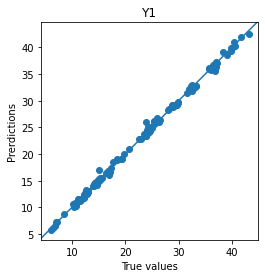

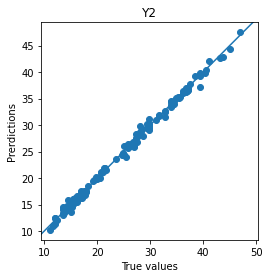

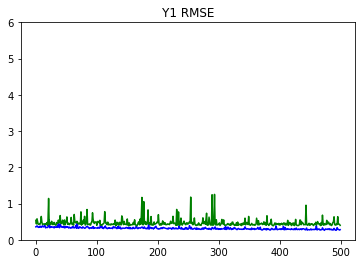

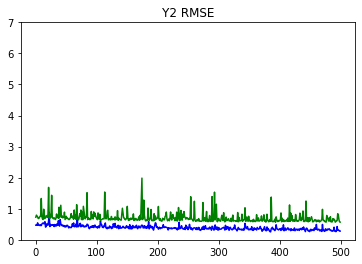

In [62]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title = 'Y1')
plot_diff(test_Y[1], Y_pred[1], title = 'Y2')

plot_metrics(metric_name = 'y1_output_root_mean_squared_error', title = 'Y1 RMSE' , ylim = 6)
plot_metrics(metric_name = 'y2_output_root_mean_squared_error', title = 'Y2 RMSE', ylim = 7 )